In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
import os
os.makedirs("./segmentation_plots")

In [2]:
from skimage.color import rgb2gray
from skimage import feature

saved_data=np.load("runs/2021-05-04 13:54:45.752992/discrete_histories.npz")
saved_frame = saved_data["frames"][:,:256,:,:]

In [3]:
from numpy.random import default_rng
from PIL import Image
from numpy import asarray

rng = default_rng()
numbers = rng.choice(saved_frame.shape[0], size=20, replace=False)
numbers

array([906, 934,   6, 274, 499,  31, 985, 512, 426, 655, 158, 435, 213,
       439, 639, 812,  58, 429, 264, 313])

In [4]:
open_ai_imgs=saved_frame[numbers]

In [5]:
def seg_sim(image):
    aux2=np.zeros((image.shape[0],256,256,1), dtype=np.uint8)
    aux2[np.where(image[:,:256, :, 1] == 105)]= [255]
    aux2[np.where(image[:,:256, :, 1] == 107)]= [255]
    aux2[np.where(image[:,:256, :, 1] == 102)]= [255]
    return aux2

In [96]:
def plot_images(img,fig,j):
    columns =int(img.shape[0] /5 % 10 )
    rows = img.shape[0] // 5
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, 2*columns, i+(columns+rows)*(j+(i-1)//(columns+rows)))
        plt.imshow(img[i-1])
        plt.axis('off')

def do_canny(imgs,img_type, name):
   
    if img_type == 'real':
        labels= imgs[1]
        imgs=imgs[0]
        img_gray = rgb2gray(imgs)
        for i,_ in enumerate(img_gray):
            if labels[i]==1:
                #brown
                img_gray[i][img_gray[i]<=0.5]=0
                img_gray[i][img_gray[i]>0.5]=1
            else:
                #grey
                img_gray[i] = feature.canny(img_gray[i], sigma=3, low_threshold=0.2)
    
        edges = img_gray # pointer magic
        
#         img_brown = img_gray[labels == 1]
#         img_brown[img_brown<=0.5]=0
#         img_brown[img_brown>0.5]=1
#         img_grey = img_gray[labels == 0]
#         edges=np.array([feature.canny(img, sigma=3, low_threshold=0.2) for img in img_grey])
#         edges = np.vstack((img_brown, edges))
    
    else:
        img_gray = np.squeeze(seg_sim(imgs))
        edges=np.array([feature.canny(img, sigma=3, low_threshold=0.2) for img in img_gray])

    
    fig=plt.figure(figsize=(16, 8))

    plot_images(imgs, fig,0)
    #plot_images(img_gray)

    plot_images(edges, fig, 1)
    
    plt.savefig(f"./segmentation_plots/{name}")

    plt.show


In [7]:
import glob
class0 = glob.glob('styletransfer/cut/datasets/road4/trainB/*_0.jpg')
class1 = glob.glob('styletransfer/cut/datasets/road4/trainB/*_1.jpg')
x_0 = np.array([np.asarray(Image.open(fname)) for fname in class0])
x_1 = np.array([np.asarray(Image.open(fname)) for fname in class1])

In [8]:
stacked=np.vstack((x_0, x_1))
labels=np.array([0]*x_0.shape[0]+[1]*x_1.shape[0])
labels.shape

(201,)

In [9]:
numbers = rng.choice(stacked.shape[0], size=20, replace=False)
numbers

array([104, 142, 182,  36, 140,  74, 154, 186,  22, 136, 188, 108,  82,
        54, 127,  71,   8, 138, 123,  10])

In [10]:
real_imgs=[stacked[numbers], labels[numbers]]

In [11]:
import glob
class0 = glob.glob('GAN_examples/*_0.png')
class1 = glob.glob('GAN_examples/*_1.png')
x_0 = np.array([np.asarray(Image.open(fname)) for fname in class0])
x_1 = np.array([np.asarray(Image.open(fname)) for fname in class1])

In [12]:
stacked=np.vstack((x_0, x_1))
labels=np.array([0]*x_0.shape[0]+[1]*x_1.shape[0])
labels.shape

(25,)

In [13]:
numbers = rng.choice(stacked.shape[0], size=20, replace=False)
numbers

array([ 3, 22, 16, 18, 11,  0, 13, 12,  1, 24,  7, 21, 14, 19,  8,  6, 23,
        2, 10, 17])

In [14]:
gan_imgs=[stacked[numbers], labels[numbers]]

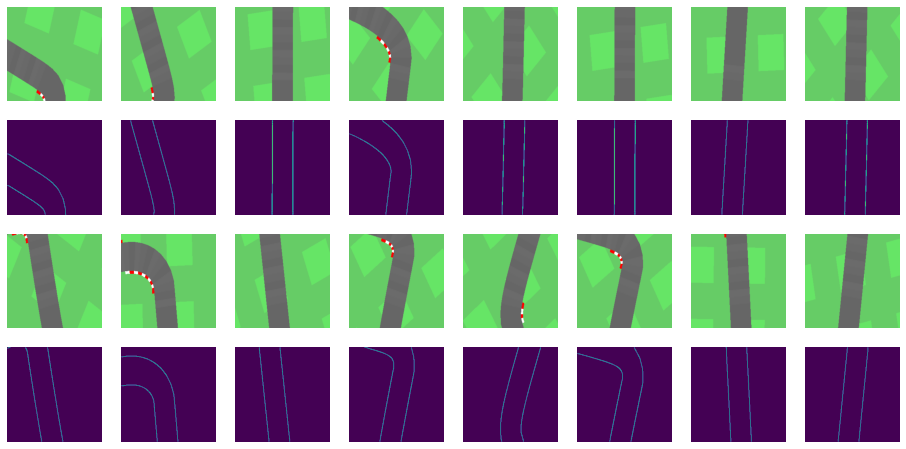

In [94]:
do_canny(open_ai_imgs, img_type="sim", name="simulated")

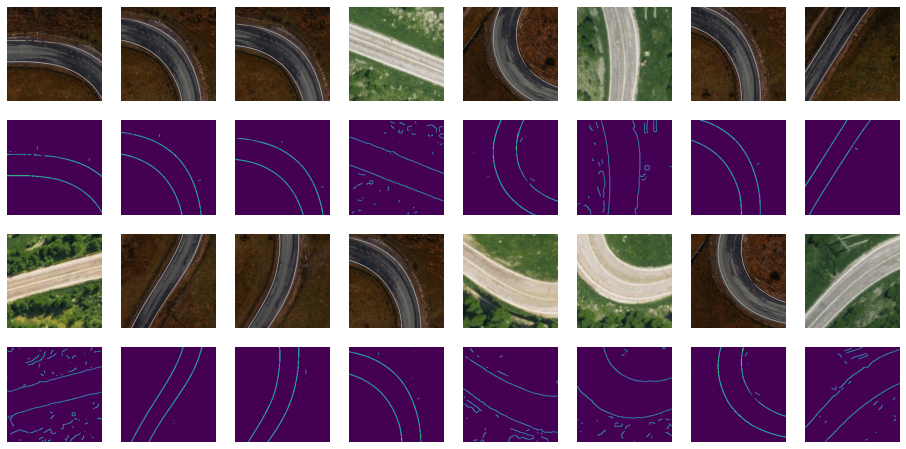

In [97]:
do_canny(real_imgs, img_type="real", name="real")

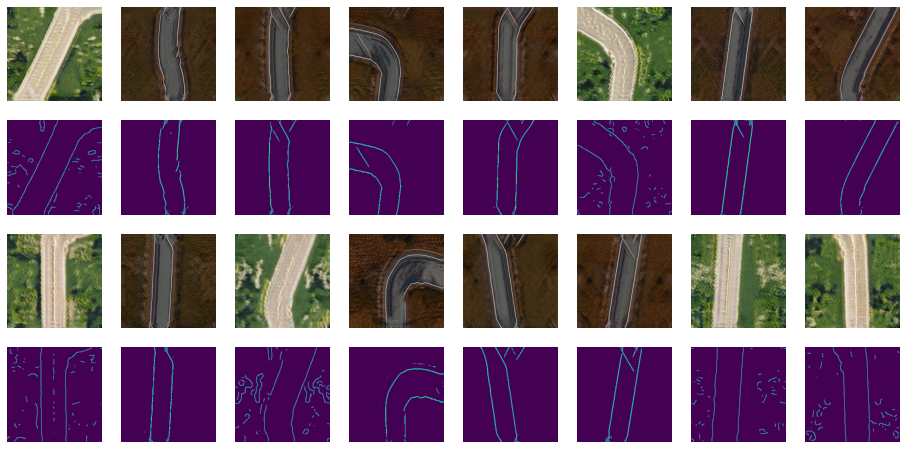

In [98]:
do_canny(gan_imgs, img_type="real", name="generated")